In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
from datetime import datetime

### Business Understanding


#### Walmart is an American retail corporation that operates a chain of hypermarkets, discount department stores, and grocery stores.

![ebe3b613-a848-11e7-ac45-8d3c52b5d95e_r2z5.jpg](attachment:ebe3b613-a848-11e7-ac45-8d3c52b5d95e_r2z5.jpg)



#### In this project, we focused to answer the following questions:
1. Which store has minimum and maximum sales?
2. Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation
3. Which store/s has good quarterly growth rate in Q3’2012
4. Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together
5. Provide a monthly and semester view of sales in units and give insights
6. Build prediction to forecast demand.


### Data Understanding

There are sales data available for 45 stores of Walmart in [Kaggle](https://www.kaggle.com/aditya6196/retail-analysis-with-walmart-data). This is the data that covers sales from 2010-02-05 to 2012-11-01.

The data contains these features:
- Store - the store number
- Date - the week of sales
- Weekly_Sales - sales for the given store
- Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
- Temperature - Temperature on the day of sale
- Fuel_Price - Cost of fuel in the region
- CPI – Prevailing consumer price index
- Unemployment - Prevailing unemployment rate


In [4]:
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/인공지능1/Retail-Analysis-with-Walmart-Data/Walmart_Store_sales.csv')
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


### Data Preparation

In [5]:
# Convert date to datetime format and show dataset information
data['Date'] =  pd.to_datetime(data['Date'], format='%d-%m-%Y')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [6]:
# checking for missing values
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [7]:
# Splitting Date and create new columns (Day, Month, and Year)
data["Day"]= pd.DatetimeIndex(data['Date']).day
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Year'] = pd.DatetimeIndex(data['Date']).year
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,5,10,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


## Build  prediction models to forecast demand (Modeling)

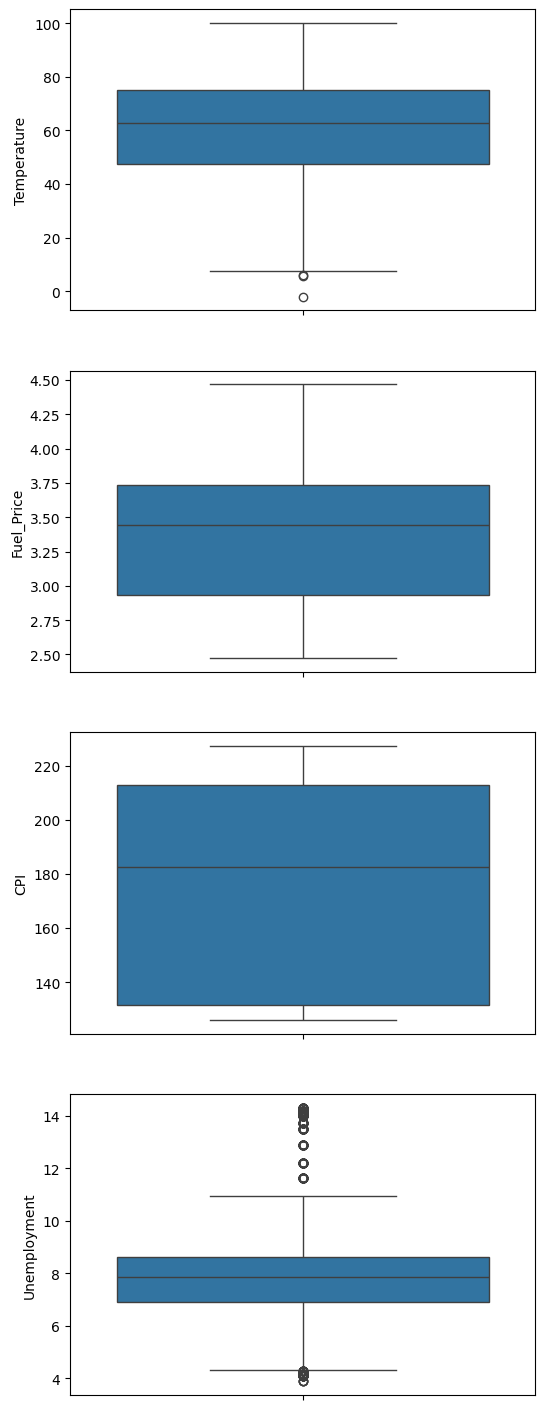

In [8]:
# find outliers
fig, axs = plt.subplots(4,figsize=(6,18))
X = data[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(data[column], ax=axs[i])


In [9]:
# drop the outliers
data_new = data[(data['Unemployment']<10) & (data['Unemployment']>4.5) & (data['Temperature']>10)]
data_new

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,5,10,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


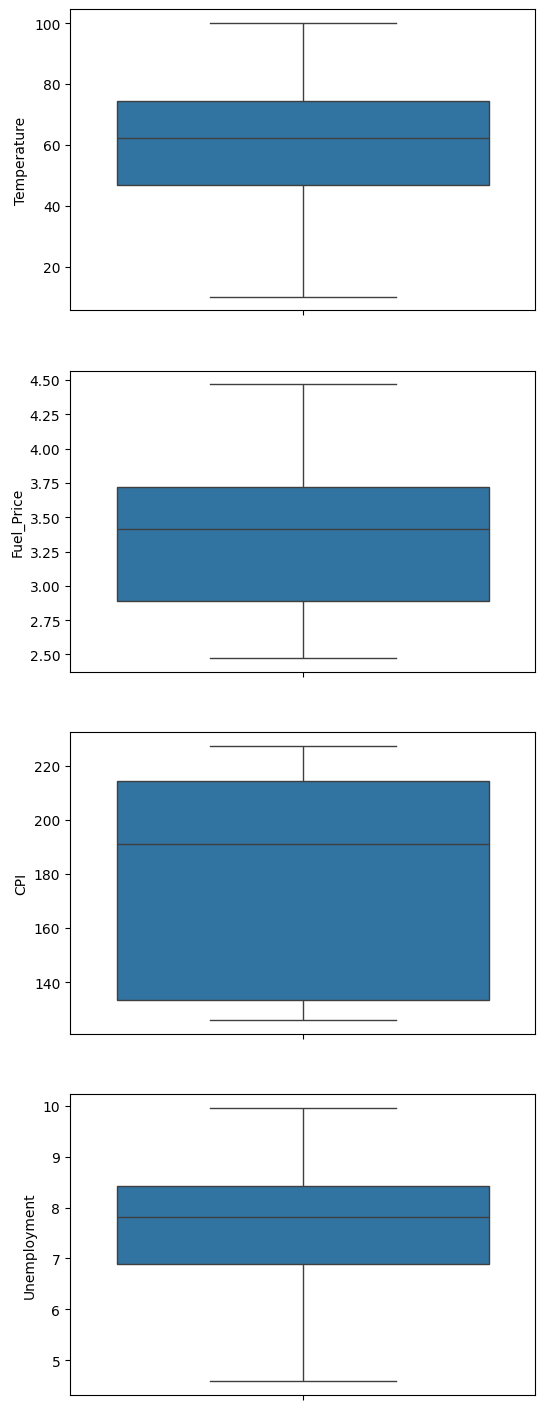

In [10]:
# check outliers
fig, axs = plt.subplots(4,figsize=(6,18))
X = data_new[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot(data_new[column], ax=axs[i])

### Build Model

In [11]:
# Import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [12]:
# 'Quarter' 필드 추가
data_new['Quarter'] = data_new['Date'].dt.quarter

<ipython-input-12-25953a52ee88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new['Quarter'] = data_new['Date'].dt.quarter


In [13]:
# Select features and target
X = data_new[['Store','Day','Month']]
y = data_new['Weekly_Sales']

# Split data to train and test (0.80:0.20)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=15)

Random Forest Regressor:

Accuracy: 95.89581821042223
Mean Absolute Error: 70004.84411232789
Mean Squared Error: 13589984345.379879
Root Mean Squared Error: 116576.08822301372


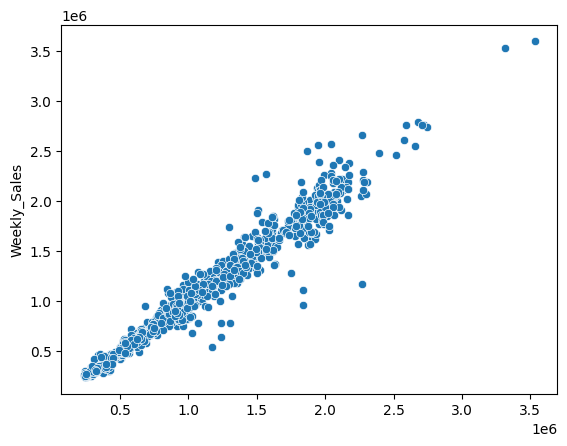

In [14]:
# Random Forest Regressor
print('Random Forest Regressor:')
print()
rfr = RandomForestRegressor(n_estimators=400,max_depth=15,n_jobs=5,random_state=42)
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)
print('Accuracy:',rfr.score(X_test, y_test)*100)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sns.scatterplot(x=y_pred, y=y_test);

Linear Regression:

Accuracy: 9.821517434413717
Mean Absolute Error: 448444.31158217543
Mean Squared Error: 297577274590.766
Root Mean Squared Error: 545506.438633648


<Axes: ylabel='Weekly_Sales'>

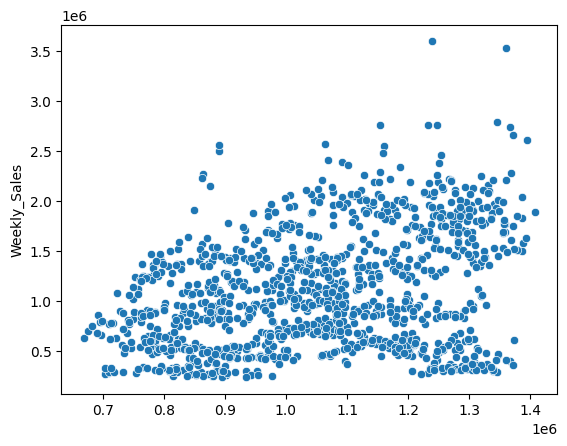

In [15]:
# Linear Regression model
print('Linear Regression:')
print()
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Accuracy:',reg.score(X_train, y_train)*100)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sns.scatterplot(x=y_pred, y=y_test)

XGB Regressor:

Accuracy: 97.33226014488338
Mean Absolute Error: 60475.07867546377
Mean Squared Error: 8833561651.83676
Root Mean Squared Error: 93987.02916805467


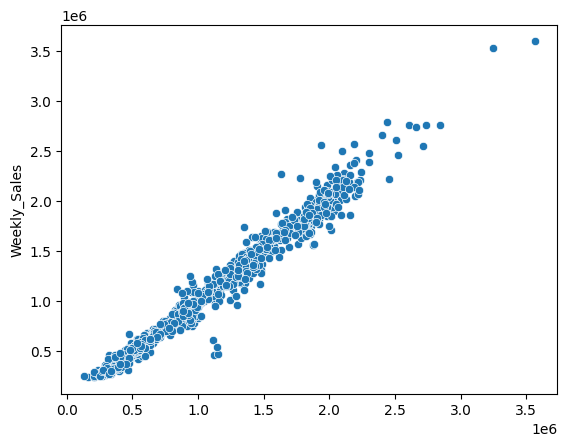

In [16]:
from xgboost import XGBRegressor

# XGB Regressor
print('XGB Regressor:')
print()
xgbr = XGBRegressor(random_state=42,n_estimators=100,learning_rate=0.2)
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)
print('Accuracy:',xgbr.score(X_test, y_test)*100)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

sns.scatterplot(x=y_pred, y=y_test);

Deep Learning 적용

In [17]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
# Select features and target
X = data_new[['Store','Day','Month','Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = data_new['Weekly_Sales']

# Split data to train and test (0.80:0.20)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=15)

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Epoch 1/100
114/114 [==============================] - 1s 4ms/step - loss: 1442683027456.0000 - val_loss: 1439966691328.0000
Epoch 2/100
114/114 [==============================] - 0s 3ms/step - loss: 1437769793536.0000 - val_loss: 1426508218368.0000
Epoch 3/100
114/114 [==============================] - 0s 3ms/step - loss: 1401680953344.0000 - val_loss: 1358504263680.0000
Epoch 4/100
114/114 [==============================] - 1s 5ms/step - loss: 1279853068288.0000 - val_loss: 1177510346752.0000
Epoch 5/100
114/114 [==============================] - 1s 5ms/step - loss: 1028933550080.0000 - val_loss: 873720971264.0000
Epoch 6/100
114/114 [==============================] - 1s 6ms/step - loss: 701507502080.0000 - val_loss: 557837647872.0000
Epoch 7/100
114/114 [==============================] - 1s 5ms/step - loss: 447507726336.0000 - val_loss: 381850222592.0000
Epoch 8/100
114/114 [==============================] - 0s 4ms/step - loss: 345213534208.0000 - val_loss: 333159071744.0000
Epoch 9

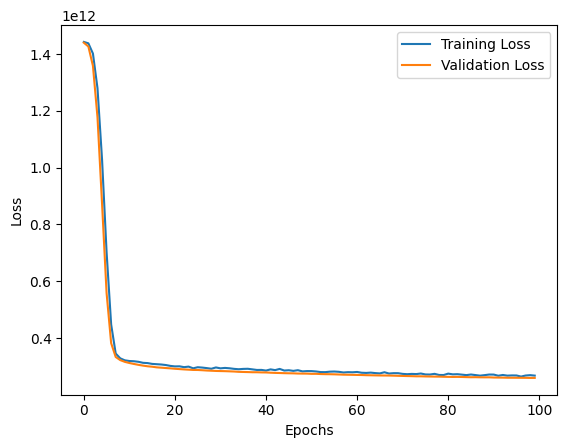

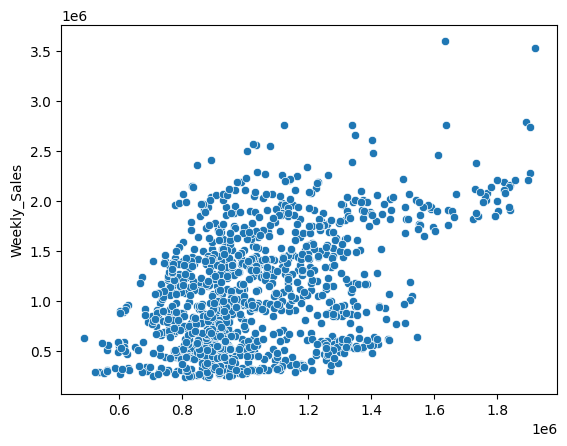

In [20]:
# 모델 구축
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])

# 테스트 데이터로 예측
y_pred = model.predict(X_test)

# 성능 평가
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# 학습 곡선 시각화
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/100
114/114 [==============================] - 2s 5ms/step - loss: 1438193549312.0000 - val_loss: 1407588892672.0000
Epoch 2/100
114/114 [==============================] - 0s 3ms/step - loss: 1033956360192.0000 - val_loss: 399718481920.0000
Epoch 3/100
114/114 [==============================] - 0s 4ms/step - loss: 336540565504.0000 - val_loss: 310339534848.0000
Epoch 4/100
114/114 [==============================] - 0s 3ms/step - loss: 316137504768.0000 - val_loss: 298979721216.0000
Epoch 5/100
114/114 [==============================] - 0s 3ms/step - loss: 309671034880.0000 - val_loss: 294278922240.0000
Epoch 6/100
114/114 [==============================] - 0s 4ms/step - loss: 303733276672.0000 - val_loss: 288080494592.0000
Epoch 7/100
114/114 [==============================] - 0s 3ms/step - loss: 300892291072.0000 - val_loss: 284717678592.0000
Epoch 8/100
114/114 [==============================] - 0s 4ms/step - loss: 297115844608.0000 - val_loss: 283793260544.0000
Epoch 9/100
1

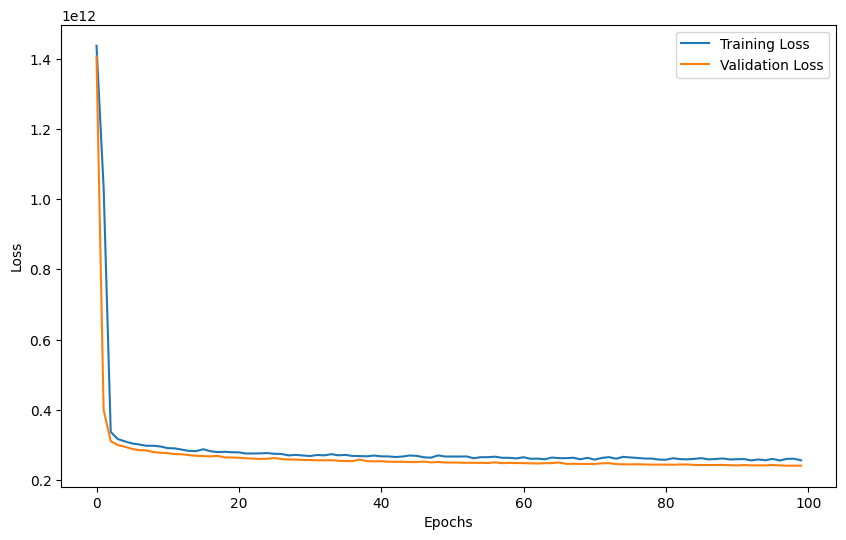

In [21]:
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])

# 예측 및 성능 평가
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# 학습 곡선 시각화
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/100
114/114 [==============================] - 2s 6ms/step - loss: 1442620375040.0000 - val_loss: 1439634030592.0000 - lr: 0.0010
Epoch 2/100
114/114 [==============================] - 0s 4ms/step - loss: 1435632271360.0000 - val_loss: 1420648120320.0000 - lr: 0.0010
Epoch 3/100
114/114 [==============================] - 0s 4ms/step - loss: 1385535635456.0000 - val_loss: 1326014660608.0000 - lr: 0.0010
Epoch 4/100
114/114 [==============================] - 0s 4ms/step - loss: 1219430187008.0000 - val_loss: 1083546402816.0000 - lr: 0.0010
Epoch 5/100
114/114 [==============================] - 1s 5ms/step - loss: 900837933056.0000 - val_loss: 719154577408.0000 - lr: 0.0010
Epoch 6/100
114/114 [==============================] - 1s 4ms/step - loss: 552982609920.0000 - val_loss: 433713446912.0000 - lr: 0.0010
Epoch 7/100
114/114 [==============================] - 1s 5ms/step - loss: 369304469504.0000 - val_loss: 336227270656.0000 - lr: 0.0010
Epoch 8/100
114/114 [===================

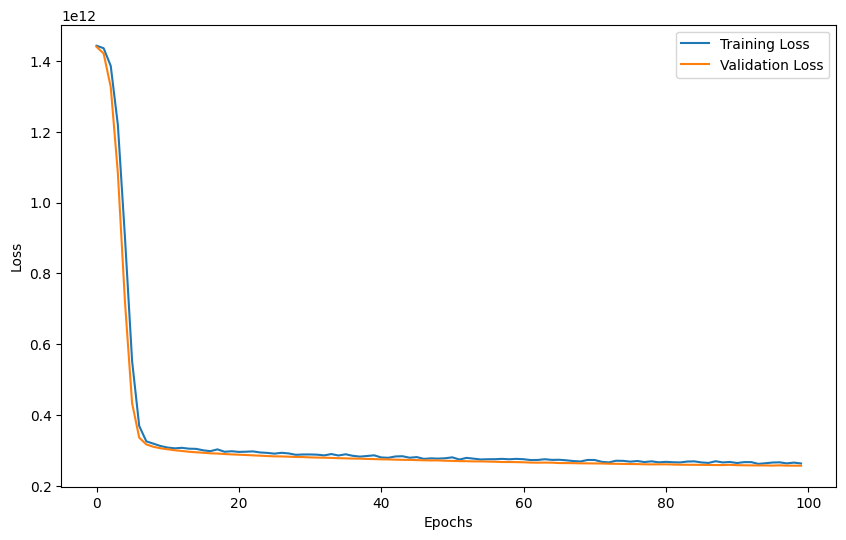

In [22]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# 모델 구축
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# ReduceLROnPlateau 콜백 설정
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# 모델 학습
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping, reduce_lr])

# 예측 및 성능 평가
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# 학습 곡선 시각화
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()